<a href="https://colab.research.google.com/github/code-with-VansikaRana09/gemini-whatsapp-bot/blob/main/AI_CaseStudy_LibvsCon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kagglehub[pandas-datasets] nltk

In [ ]:
import kagglehub
import os
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import kagglehub

path = kagglehub.dataset_download("neelgajare/liberals-vs-conservatives-on-reddit-13000-posts")
print(path)

Using Colab cache for faster access to the 'liberals-vs-conservatives-on-reddit-13000-posts' dataset.
/kaggle/input/liberals-vs-conservatives-on-reddit-13000-posts


In [ ]:
import os

folder = path
print(os.listdir(folder))

['file_name.csv']


In [ ]:
file_path = "file_name.csv"

In [ ]:
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "neelgajare/liberals-vs-conservatives-on-reddit-13000-posts",
    file_path,
)

/tmp/ipython-input-446812088.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'liberals-vs-conservatives-on-reddit-13000-posts' dataset.


In [ ]:
df.head(20)

,Title,Political Lean,Score,Id,Subreddit,URL,Num of Comments,Text,Date Created
0,"No matter who someone is, how they look like, ...",Liberal,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0,NaN,1.646272e+09
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1,NaN,1.646271e+09
2,State of the union,Liberal,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1,Who watched the state of the union last night ...,1.646270e+09
3,We Should Just Give Poor People Money,Liberal,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3,NaN,1.646270e+09
4,Do it for the Dew,Liberal,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1,NaN,1.646268e+09
5,Proposed Bill Would Allow Kids With Contagious...,Liberal,3,t5eqc6,progressive,https://www.newson6.com/story/621f8983241e3107...,5,NaN,1.646268e+09
6,3 House Republicans voted against a bipartisan...,Liberal,11,t5eqa1,democrats,https://www.businessinsider.com/3-house-republ...,4,NaN,1.646268e+09
7,"If you're bombing civilian targets, you're the...",Liberal,0,t5epal,alltheleft,https://i.redd.it/hjysdukbe2l81.png,2,NaN,1.646268e+09
8,Every city have to government their resources ...,Liberal,0,t5ejvw,socialism,https://www.reddit.com/r/socialism/comments/t5...,2,NaN,1.646267e+09
9,Workers Behind First Union Push at an Amazon R...,Liberal,19,t5egv1,socialism,https://www.businessinsider.com/workers-first-...,0,NaN,1.646267e+09


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Convert NaN to string to avoid errors
df['Text'] = df['Text'].astype(str)

# Tokenization
def tokenize_sentence(sentence):
    tokens = word_tokenize(sentence)
    # Filter out tokens that are purely numeric
    return [token for token in tokens if not token.isdigit()]

df['Tokenized_Text'] = df['Text'].apply(tokenize_sentence)

df[['Text', 'Tokenized_Text']].head(10)

,Text,Tokenized_Text
0,nan,[nan]
1,nan,[nan]
2,Who watched the state of the union last night ...,"[Who, watched, the, state, of, the, union, las..."
3,nan,[nan]
4,nan,[nan]
5,nan,[nan]
6,nan,[nan]
7,nan,[nan]
8,nan,[nan]
9,nan,[nan]


In [ ]:
stemmer = PorterStemmer()

def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

df['Stemmed_Tokens'] = df['Tokenized_Text'].apply(stem_words)

df[['Tokenized_Text', 'Stemmed_Tokens']].head(10)

,Tokenized_Text,Stemmed_Tokens
0,[nan],[nan]
1,[nan],[nan]
2,"[Who, watched, the, state, of, the, union, las...","[who, watch, the, state, of, the, union, last,..."
3,[nan],[nan]
4,[nan],[nan]
5,[nan],[nan]
6,[nan],[nan]
7,[nan],[nan]
8,[nan],[nan]
9,[nan],[nan]


In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import wordnet
from nltk import pos_tag

# Ensure necessary downloads
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN

def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)
    return [lemmatizer.lemmatize(word.lower(), get_wordnet_pos(pos)) for word, pos in pos_tags]

df['Lemmatized_Tokens'] = df['Tokenized_Text'].apply(lemmatize_tokens)

df[['Tokenized_Text', 'Lemmatized_Tokens']].head(10)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Tokenized_Text,Lemmatized_Tokens
0,[nan],[nan]
1,[nan],[nan]
2,"[Who, watched, the, state, of, the, union, las...","[who, watch, the, state, of, the, union, last,..."
3,[nan],[nan]
4,[nan],[nan]
5,[nan],[nan]
6,[nan],[nan]
7,[nan],[nan]
8,[nan],[nan]
9,[nan],[nan]


# BOW

In [ ]:

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

df['Lemmatized_Text'] = df['Lemmatized_Tokens'].apply(lambda tokens: ' '.join(tokens))
# Initialize CountVectorizer for BoW
bow_vectorizer = CountVectorizer()

# Fit and transform the lemmatized text to create the BoW matrix
bow_matrix = bow_vectorizer.fit_transform(df['Lemmatized_Text'])

print("Shape of BoW matrix:", bow_matrix.shape)

Shape of BoW matrix: (12854, 21337)


In [ ]:
# Get feature names (vocabulary)
feature_names_bow = bow_vectorizer.get_feature_names_out()

# Display a sample of the BoW matrix (first 5 rows and last 10 features)
sample_rows = 5
sample_cols = 10

print(f"Displaying the first {sample_rows} rows and random {sample_cols} features of the BoW matrix:")

random_indices = np.random.choice(len(feature_names_bow), sample_cols, replace=False)
sample_bow_df = pd.DataFrame(
    bow_matrix[:sample_rows, random_indices].toarray(),
    columns=feature_names_bow[random_indices]
)
display(sample_bow_df)

Displaying the first 5 rows and random 10 features of the BoW matrix:


,banish,crony,detection,dealt,hitherto,predictably,unitat,contra,emotional,creator
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:

# Display a random sample of the vocabulary to illustrate the features
num_features_to_display = min(20, len(feature_names_bow))

random_features_bow = np.random.choice(feature_names_bow, num_features_to_display, replace=False)
print("Random 20 BoW feature names (vocabulary):")
print(random_features_bow)

Random 20 BoW feature names (vocabulary):
['debate' 'anus' '28k'
 'iwar2nl4fuqkjhlb5bdddbmlbk3wtbzgrlwghxivplykmdpsigmjshbnmgdgg'
 'rethoric' 'degradation' 'pledge' 'gewaltverhältnisse' 'attempt' 'e5dt8'
 'effective' 'carpet' 'monstrous' 'engendered' 'bei' 'stabilizing'
 'alingside' 'blog' 'beyond' 'rockefeller']


In [ ]:
import numpy as np

# Sum counts of each word across all documents
word_counts = np.asarray(bow_matrix.sum(axis=0)).ravel()

# Create a dictionary: {word: total_count}
word_freq_dict = dict(zip(feature_names_bow, word_counts))

# Now word_freq_dict is ready for visualization


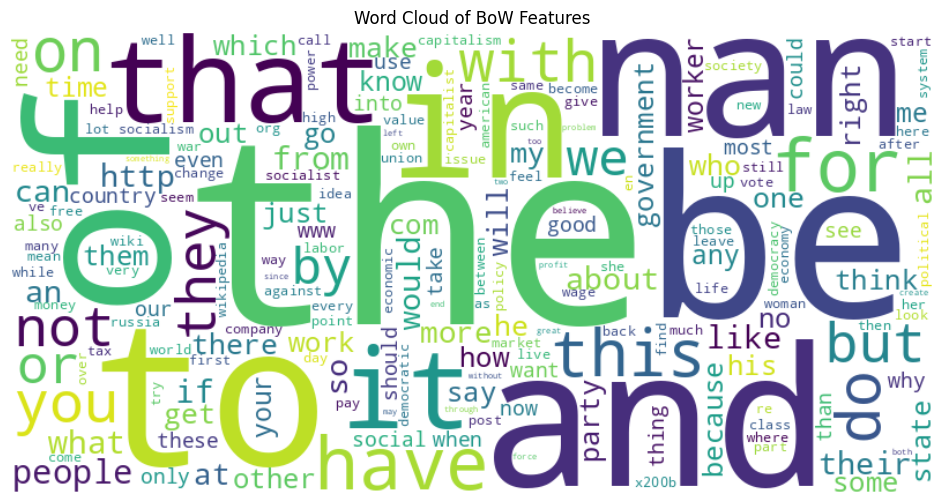

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Sum counts of each word across all documents
word_counts = np.asarray(bow_matrix.sum(axis=0)).ravel()
word_freq_dict = dict(zip(feature_names_bow, word_counts))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of BoW Features")
plt.show()


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['Lemmatized_Text_String'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the lemmatized text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Lemmatized_Text_String'])

print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (12854, 21337)


In [ ]:

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# First 5 rows
sample_rows = 5
sample_cols = 10 # Displaying last 10 features

if tfidf_matrix.shape[0] > sample_rows or tfidf_matrix.shape[1] > sample_cols:
    print(f"Displaying the first {sample_rows} rows and last {sample_cols} features of the TF-IDF matrix:")
    sample_tfidf_df = pd.DataFrame(tfidf_matrix[:sample_rows, -sample_cols:].toarray(), columns=feature_names[-sample_cols:])
else:
    print("Displaying the full TF-IDF matrix:")
    sample_tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

display(sample_tfidf_df)

Displaying the first 5 rows and last 10 features of the TF-IDF matrix:


,šternberk,žižek,ˈanərˌkizəm,αap,борьбой,казахстана,рабочих,солидар,فدان,사회변혁노동자당
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
num_features_to_display = min(20, len(feature_names))

random_features = np.random.choice(feature_names, num_features_to_display, replace=False)
print("Random 20 feature names:")
print(random_features)

Random 20 feature names:
['deist' 'sequence' 'contest' 'gdr' 'frische' 'restarted' '_chill'
 'openess' 'tremaux' 'shield' 'comoros' 'superman'
 'trianglefire_25march1911_bodiesonsidewalk' 'glastnose' 'unfolding'
 'caucasus' 'antimilitarist' 'intrigue' 'aquired' 'destabilise']


# **GloVe**

In [2]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip




--2025-11-16 10:05:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-16 10:05:04--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-16 10:05:05--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [3]:
import numpy as np

embedding_index = {}

with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = vector

print("Loaded GloVe vectors:", len(embedding_index))


Loaded GloVe vectors: 400000


In [4]:
def get_sentence_embedding(tokens):
    vectors = []
    for word in tokens:
        if word in embedding_index:
            vectors.append(embedding_index[word])

    if len(vectors) == 0:
        return np.zeros(100)

    return np.mean(vectors, axis=0)


In [5]:
df['GloVe_Vector'] = df['Lemmatized_Tokens'].apply(get_sentence_embedding)

X_glove = np.vstack(df['GloVe_Vector'].values)

print("GloVe feature matrix shape:", X_glove.shape)


NameError: name 'df' is not defined